In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imbalance_data = pd.read_csv('../data/imbalanced_data.csv')
imbalance_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## EDA

<Axes: xlabel='label', ylabel='count'>

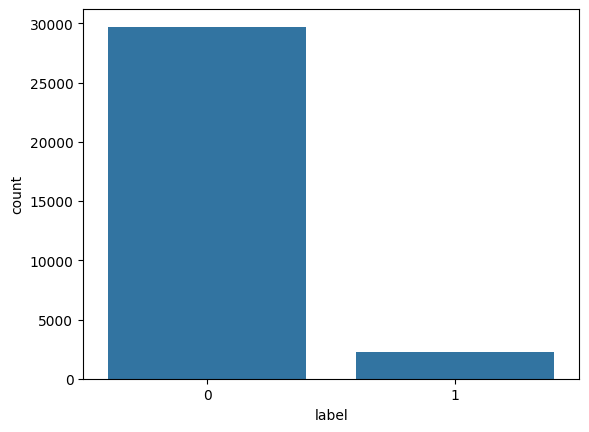

In [3]:
sns.countplot(x = "label", data = imbalance_data)

- 0 ---> No hate
- 1 ---> Hate

In [4]:
imbalance_data.shape

(31962, 3)

In [5]:
imbalance_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
imbalance_data.drop("id", axis=1, inplace=True)

In [7]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [8]:
imbalance_data.duplicated().value_counts()

False    29530
True      2432
Name: count, dtype: int64

In [9]:
raw_data = pd.read_csv("../data/raw_data.csv")
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
raw_data.shape

(24783, 7)

In [11]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [12]:
raw_data.drop(
    ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],
    axis = 1, 
    inplace = True    
)

In [13]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data.duplicated().value_counts()

False    24783
Name: count, dtype: int64

In [15]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

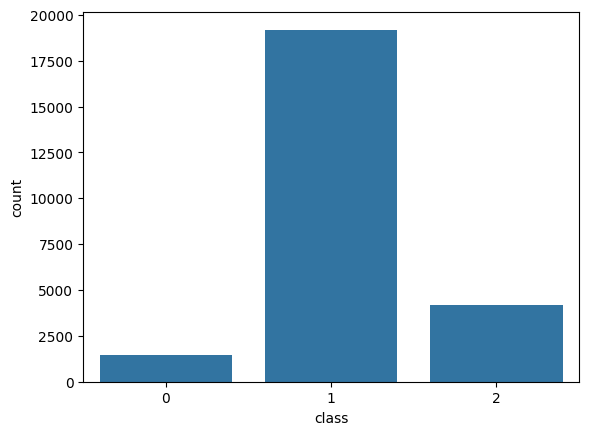

In [16]:
sns.countplot(x = "class", data = raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate

In [17]:
# Let's move the valus of the class 1 into class 0.
raw_data.loc[raw_data['class'] == 0, 'class'] = 1

In [18]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [19]:
raw_data['class'].value_counts()

class
1    20620
2     4163
Name: count, dtype: int64

In [20]:
# replace the value of 0 to 1 and 2 to 0
# 0 ---> no hate and 1 ---> hate
raw_data["class"] = raw_data["class"].replace({0: 1})
raw_data["class"] = raw_data["class"].replace({2: 0})

<Axes: xlabel='class', ylabel='count'>

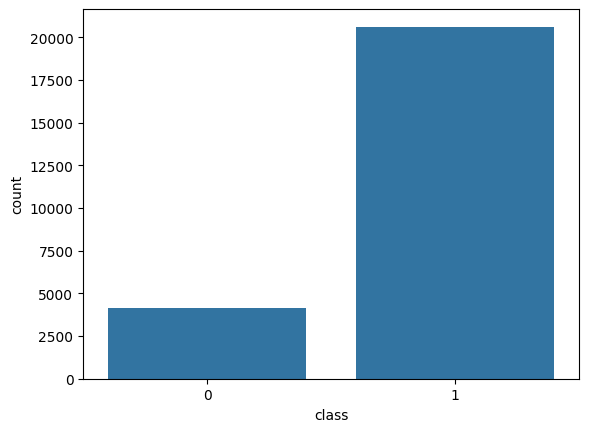

In [21]:
sns.countplot(x = "class", data = raw_data)

In [22]:
# Let's change the name of the class to label

raw_data.rename(columns={'class' : 'label'}, inplace=True)

In [23]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [24]:
# Let's concatinate both the data into a single data frame.
frame = [imbalance_data, raw_data]
df = pd.concat(frame)

In [25]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


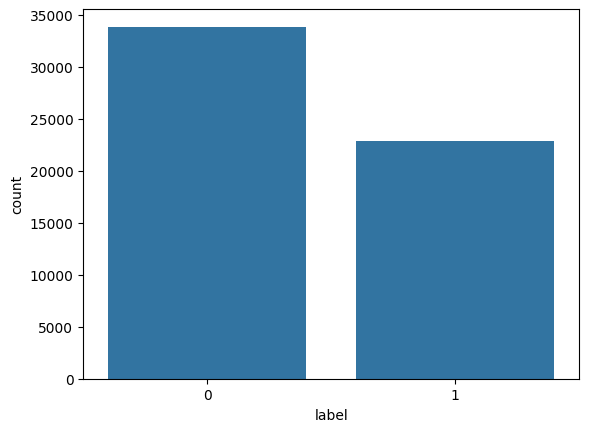

In [26]:
sns.countplot(x = 'label', data=df)
plt.show()

In [27]:
df[df['label'] == 0].duplicated().value_counts()

False    31680
True      2203
Name: count, dtype: int64

In [28]:
df[df['label'] == 1].duplicated().value_counts()

False    22633
True       229
Name: count, dtype: int64

In [29]:
df.duplicated().value_counts()

False    54313
True      2432
Name: count, dtype: int64

In [30]:
df.drop_duplicates(inplace=True)

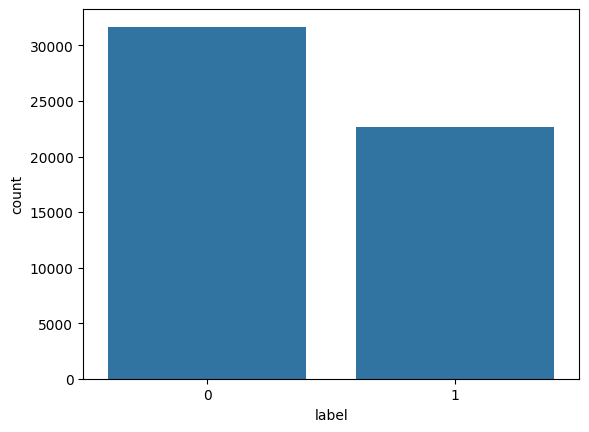

In [31]:
#counterplot after remove duplicates rows
sns.countplot(x = 'label', data=df)
plt.show()

In [32]:
df.shape

(54313, 2)

## Data Preprocessing

In [33]:
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stemmer = nltk.SnowballStemmer("english")
stopwords = set(stopwords.words("english"))

In [35]:

def data_cleaning(words):
    words = str(words).lower()
    words = re.sub(r'\[.*?\]', '', words)  # Use raw string
    words = re.sub(r'https?://\S+|www\.\S+', '', words)  # Use raw string
    words = re.sub(r'<.*?>+', '', words)  # Use raw string
    words = re.sub(r'[%s]' % re.escape(string.punctuation), '', words)  # Use raw string
    words = re.sub(r'\n', '', words)  # Use raw string
    words = re.sub(r'\w*\d\w*', '', words)  # Use raw string
    
    # Split and filter out stopwords
    words = [word for word in words.split(' ') if word not in stopwords]
    
    # Stem words
    words = [stemmer.stem(word) for word in words]
    
    # Join back into a single string
    return " ".join(words)

In [36]:
df['tweet'][5]

5    [2/2] huge fan fare and big talking before the...
5    !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
Name: tweet, dtype: object

In [37]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [38]:
df['tweet'][5]

5     huge fan fare big talk leav chao pay disput g...
5    tmadisonx shit blow meclaim faith somebodi sti...
Name: tweet, dtype: object

In [39]:
x = df['tweet']
y = df['label']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42
)
print(f'x train {len(x_train)}')
print(f'x test {len(x_test)}')
print(f'y train {len(y_train)}')
print(f'y test {len(y_test)}')

x train 40734
x test 13579
y train 40734
y test 13579


## Feature engineering

In [41]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [42]:
max_words = 40734
max_len = 500

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences, maxlen = max_len)

In [43]:
print("Shape of sequences_matrix:", sequences_matrix.shape)

Shape of sequences_matrix: (40734, 500)


In [44]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
# Compile the model
model.compile(
    loss='binary_crossentropy', 
    optimizer=RMSprop(), 
    metrics=['accuracy']
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          4073400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 4,153,901
Trainable params: 4,153,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
# starting model training
history = model.fit(
    sequences_matrix, 
    y_train, 
    batch_size = 128,
    epochs = 1,
    validation_split = 0.2
)

255/255 [==============================] - 1365s 5s/step - loss: 0.2787 - accuracy: 0.8879 - val_loss: 0.1774 - val_accuracy: 0.9353


In [48]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [49]:
test_sequences_matrix

array([[    0,     0,     0, ...,   208,   176,   249],
       [    0,     0,     0, ...,     6,   211,  2467],
       [    0,     0,     0, ...,    54,     2, 14154],
       ...,
       [    0,     0,     0, ...,  2867,     1,    42],
       [    0,     0,     0, ...,    10,   113,     2],
       [    0,     0,     0, ..., 11775,   585,  1598]])

In [50]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix, y_test)

425/425 [==============================] - 66s 155ms/step - loss: 0.1728 - accuracy: 0.9367


In [51]:
lstm_prediction = model.predict(test_sequences_matrix)

425/425 [==============================] - 58s 136ms/step


In [52]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,res))

[[7716  194]
 [ 665 5004]]


In [55]:
import pickle
with open('model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
# Let's save the mdoel.
model.save("model/model.h5")

In [57]:
import keras
load_model = keras.models.load_model("model/model.h5")
with open('model/tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [66]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = re.sub(r'\[.*?\]', '', text)  # Use raw string
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Use raw string
    text = re.sub(r'<.*?>+', '', text)  # Use raw string
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Use raw string
    text = re.sub(r'\n', '', text)  # Use raw string
    text = re.sub(r'\w*\d\w*', '', text)  # Use raw string
    
    print(text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

test = [clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=500)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

i love this movie
i love this movie
['love movi']
[[6, 365]]
1/1 [==============================] - 0s 79ms/step
pred [[0.04127784]]
no hate
